In [18]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.dummy import DummyRegressor
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('./Description_Extracted.csv')
df = df.iloc[:,4:]

df = df.replace(False, 0).replace(True, 1)

df['Bedrooms'] = np.where(df['Bedrooms'].isnull(), df['Bedrooms'].mode(), df['Bedrooms'])
df['Bathrooms'] = np.where(df['Bathrooms'].isnull(), df['Bathrooms'].mode(), df['Bathrooms'])
df['Date']  = pd.to_datetime(df['Date'].str[11:])
df['MatchedDistricts'] = df['MatchedDistricts'].str.replace(', ', '_')
# df = df.sort_values('MatchedDistricts')
# df['Lat'] = df['Lat'].fillna(method = 'bfill')
# df['Lon'] = df['Lon'].fillna(method = 'bfill')

df['Lat'] = df['Lat'] -  df['Lat'].mean()
df['Lon'] = df['Lon'] -  df['Lon'].mean()
df['distance'] = np.sqrt(df['Lat']**2 + df['Lon']**2)*1000
df['distance'] = df['distance'].fillna(df['distance'].mean())

df = df[df['Price'].notnull()]
mask = df['Price'] < 1e9
df = df[mask]
X = pd.get_dummies(df.drop(['Location', 'Description', 'Date', 'Lat', 'Lon', 'Price'], axis = 1))
y = df['Price']
X

,Bedrooms,Bathrooms,Apartment,WaterTank,distance,MatchedDistricts_GACURIRO_Rwanda,MatchedDistricts_GASABO_Rwanda,MatchedDistricts_GASOGI_Rwanda,MatchedDistricts_GATENGA_Rwanda,MatchedDistricts_GIKONDO_Rwanda,...,MatchedDistricts_MASORO_Rwanda,MatchedDistricts_NDERA_Rwanda,MatchedDistricts_NIBOY_Rwanda,MatchedDistricts_NYAMATA_Rwanda,MatchedDistricts_NYAMIRAMBO_Rwanda,MatchedDistricts_NYARUTARAMA_Rwanda,MatchedDistricts_REMERA_Rwanda,MatchedDistricts_RUSORORO_Rwanda,MatchedDistricts_RUYENZI_Rwanda,MatchedDistricts_ZINDIRO_Rwanda
0,4.0,3.0,0.0,0.0,36.829055,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,3.0,0.0,0.0,16.682040,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,0.0,0.0,16.682040,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,0.0,0.0,16.682040,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,3.0,0.0,0.0,16.682040,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,4.0,3.0,0.0,1.0,43.895081,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,4.0,3.0,0.0,1.0,41.022012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,5.0,4.0,0.0,1.0,9.129239,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,4.0,3.0,0.0,1.0,9.129239,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.to_csv('render.csv', index = None)

# Lasso回归

In [27]:
lasso = Lasso()
grid_params = {'alpha': np.logspace(-3, 5, 9)}
gridCV = GridSearchCV(lasso, grid_params, cv = 5)
gridCV.fit(X, y )
best_lasso = gridCV.best_estimator_
y_pred = best_lasso.predict(X)
lasso_pred = best_lasso.predict(X)
r2 = best_lasso.score(X, y)
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = mse**0.5
print('R-square :', r2)
print('RMSE :', rmse)
print('MAE :', mae)


R-square : 0.526473790462644
RMSE : 38735022.43714526
MAE : 21711110.303597912


In [30]:
best_lasso.alpha

100000.0

In [33]:
lasso_coef_df = pd.DataFrame({'feature':X.columns ,'Lasso_coef': best_lasso.coef_ })
lasso_coef_df = lasso_coef_df.append({ 'feature':'intercept', 'Lasso_coef':best_lasso.intercept_ }, 
                                     ignore_index = True)

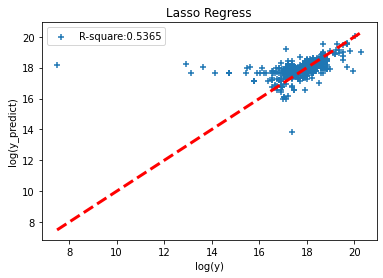

In [36]:
plt.scatter(np.log(y), np.log(y_pred), marker = '+', label = 'R-square:{:.4f}'.format(r2))
plt.plot([min(np.log(y)), max(np.log(y))], [min(np.log(y)), max(np.log(y))], 'r--',linewidth = 3)
plt.ylabel('log(y_predict)')
plt.xlabel('log(y)')
plt.title('Lasso Regress')
plt.legend()
plt.show()

# Ridge

In [39]:
ridge = Ridge()
grid_params = {'alpha': np.logspace(-3, 5, 9)}
gridCV = GridSearchCV(ridge, grid_params, cv = 5)
gridCV.fit(X, y )
best_ridge = gridCV.best_estimator_
y_pred = best_ridge.predict(X)
ridge_pred = best_ridge.predict(X)
r2 = best_ridge.score(X, y)
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = mse**0.5
print('R-square :', r2)
print('RMSE :', rmse)
print('MAE :', mae)

R-square : 0.5364758358747028
RMSE : 38323749.30247898
MAE : 21127335.288648695


In [42]:
best_ridge.alpha

0.1

In [45]:
ridge_coef_df = pd.DataFrame({'feature':X.columns ,'Ridge_coef': best_ridge.coef_ })
ridge_coef_df = ridge_coef_df.append({ 'feature':'intercept', 'Ridge_coef':best_lasso.intercept_ }, 
                                     ignore_index = True)

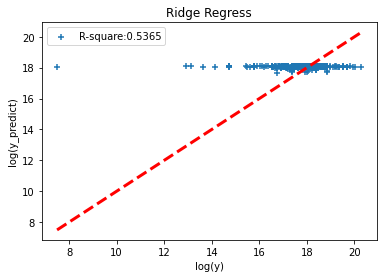

In [48]:
plt.scatter(np.log(y), np.log(y_pred), marker = '+', label = 'R-square:{:.4f}'.format(r2))
plt.plot([min(np.log(y)), max(np.log(y))], [min(np.log(y)), max(np.log(y))], 'r--',linewidth = 3)
plt.ylabel('log(y_predict)')
plt.xlabel('log(y)')
plt.title('Ridge Regress')
plt.legend()
plt.show()

# coef summary

In [51]:
coef_df = pd.merge(lasso_coef_df, ridge_coef_df)
coef_df

,feature,Lasso_coef,Ridge_coef
0,Bedrooms,2.084930e+07,1.984448e+07
1,Bathrooms,1.518705e+07,1.486072e+07
2,Apartment,1.192853e+08,1.314969e+08
3,WaterTank,1.141885e+07,1.166665e+07
4,distance,-3.330505e+04,-5.340920e+04
5,MatchedDistricts_GACURIRO_Rwanda,3.831727e+07,3.581308e+07
6,MatchedDistricts_GASABO_Rwanda,-4.452274e+06,-1.757410e+07
7,MatchedDistricts_GASOGI_Rwanda,-1.044572e+06,-4.105048e+07
8,MatchedDistricts_GATENGA_Rwanda,-0.000000e+00,-1.304941e+07
9,MatchedDistricts_GIKONDO_Rwanda,-4.552458e+06,-1.476444e+07


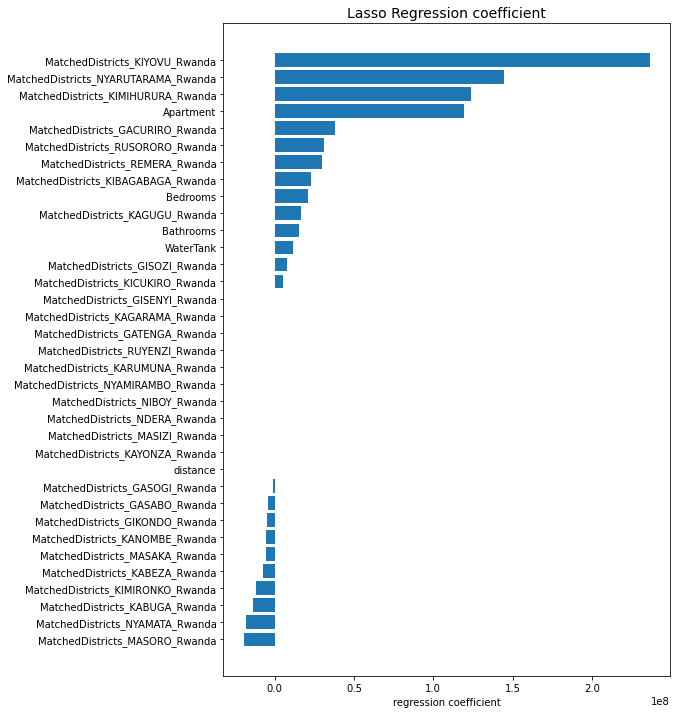

In [54]:
temp_df = coef_df.head(35)
temp_df = temp_df.sort_values('Lasso_coef')
plt.figure(figsize = (8,12))
plt.barh( temp_df['feature'], temp_df['Lasso_coef'])
plt.xlabel('regression coefficient')
plt.title('Lasso Regression coefficient', fontsize = 14)
plt.show()

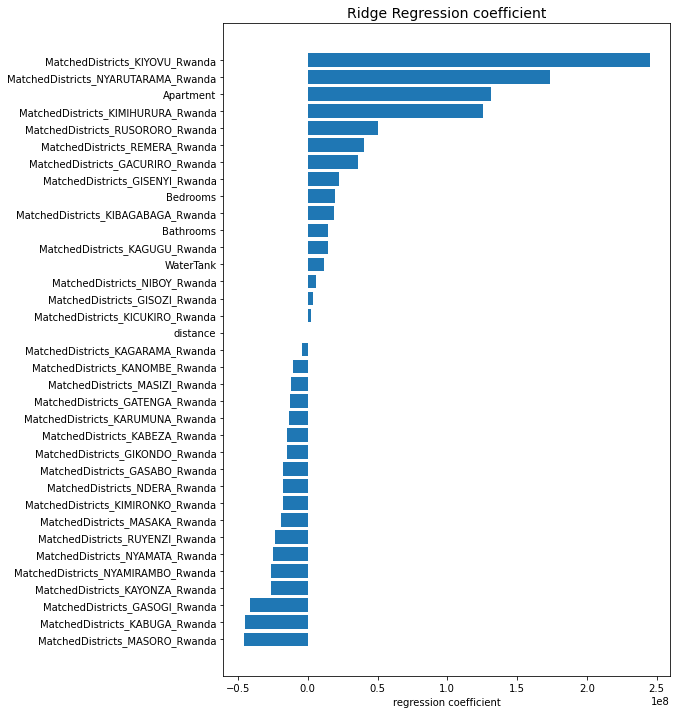

In [57]:
temp_df = coef_df.head(35)
temp_df = temp_df.sort_values('Ridge_coef')
plt.figure(figsize = (8,12))
plt.barh( temp_df['feature'], temp_df['Ridge_coef'])
plt.xlabel('regression coefficient')
plt.title('Ridge Regression coefficient', fontsize = 14)
plt.show()

In [59]:
n = 50
plt.plot(range(n), y.head(n), label = 'observation',)
plt.plot(range(n), lasso_pred[:n], label=' Lasso')
plt.plot(range(n), ridge_pred[:n], label=' Ridge')
plt.ylabel('price')
plt.xlabel('Random Samples')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# 交叉验证
## lasso回归

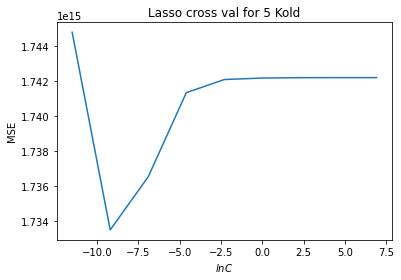

In [52]:
from sklearn.model_selection import cross_val_predict
alphas = np.logspace(-3, 5, 9)
C = 1 / alphas
lasso_mses = []

for alpha in alphas:
    lasso = Lasso(alpha)
    y_pred = cross_val_predict(lasso, X,y)
    mse = mean_squared_error(y,y_pred)
    lasso_mses.append(mse)

plt.plot(np.log(C), lasso_mses)
plt.xlabel("$ln{C}$")
plt.ylabel('MSE')
plt.title('Lasso cross val for 5 Kold')
plt.show()

## Ridge

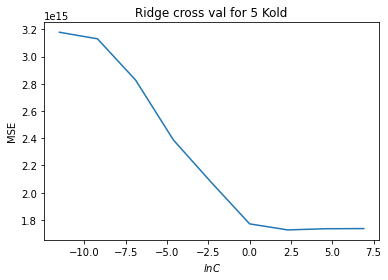

In [55]:
alphas = np.logspace(-3, 5, 9)
C = 1 / alphas

ridge_mses = []
for alpha in alphas:
    ridge = Ridge(alpha)
    y_pred = cross_val_predict(ridge, X,y)
    mse = mean_squared_error(y,y_pred)
    ridge_mses.append(mse)

plt.plot(np.log(C), ridge_mses)
plt.xlabel("$ln{C}$")
plt.ylabel('MSE')
plt.title('Ridge cross val for 5 Kold')
plt.show()

In [58]:
from sklearn.preprocessing import  PolynomialFeatures

In [60]:
PF = PolynomialFeatures(degree=2)
PF.fit_transform(X).shape


(758, 703)

In [77]:
dummyRegress = DummyRegressor(strategy='mean')

dummyRegress.fit(X,y)

dummyPred = dummyRegress.predict(X)

score = dummyRegress.score(X, y)

mse = mean_squared_error(y,dummyPred)
mae = mean_absolute_error(y,dummyPred)
rmse = mse**0.5

print("R squared: %f"%score)
print("MSE: %f"%mse)
print("MAE: %f"%mae)
print("RMSE: %f"%rmse)

R squared: -0.048208
MSE: 3321323553566279.500000
MAE: 32632820.844327
RMSE: 57630925.322836


[0    1.743466e+15
dtype: float64 0    1.846240e+15
dtype: float64
 0    1.979269e+15
dtype: float64 0    1.731072e+16
dtype: float64]
[0    2.388360e+15
dtype: float64 0    1.876120e+15
dtype: float64
 0    6.415959e+17
dtype: float64 0    4.069854e+20
dtype: float64]


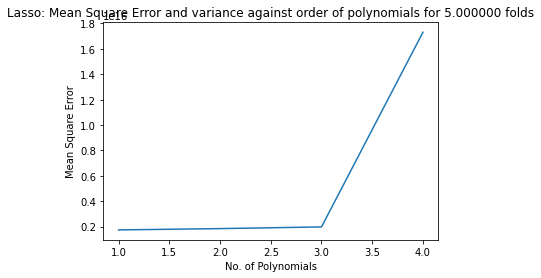

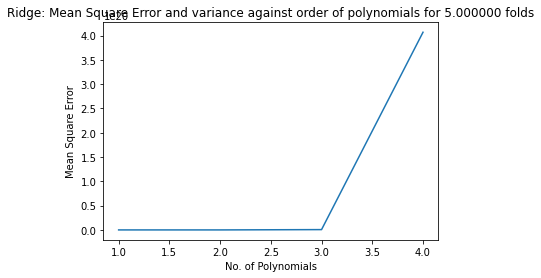

In [74]:
def kfolds(x_train, y_train, folds, model, filename, c = 1):

    #Check if it is a log model - it uses C, whereas others use alpha as the regularisation parameter
    #Also check for kNN model, as it takes a n_neighbours 


    alpha = 1 / c
    model.alpha = alpha    


    kf = KFold(n_splits = folds)
    if (y_train.ndim > 1):
        y_train = np.ravel(y)
    
    for train, test in kf.split(X):

        #print(x_train[train])
        model.fit(x_train[train], y_train[train])
        ypred = model.predict(x_train[test])
        mean_square_er = mean_squared_error(y_train[test],ypred)

        if (("df" not in locals())):

            df = pd.DataFrame([mean_square_er])
            continue

        df = df.append(pd.DataFrame([mean_square_er]))

    mean = df.mean()
    var = df.iloc[:,0:folds].var()

    #Last two values of the column will be the mean and var

    df = df.append([mean])
    df = df.append([var])
 
    #Write to csv

    df.to_csv(filename + '.csv')

    return [mean, var, folds, c]



def crossValpoly(Train_x, Train_y,Orders, model, modelType, filename):

    meansVars = []

    for order in Orders:
        poly = PolynomialFeatures(order)
        X_train_adj = poly.fit_transform(X)
        folds = kfolds(X_train_adj, Train_y, 5,model,"Poly_Folds.csv",0.01)
        folds.append(order)
        meansVars.append(folds)


    meansVars = np.array(meansVars)
    meansVars = meansVars.transpose()
    pd.DataFrame(meansVars).to_csv(filename + ".csv")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(modelType + ": Mean Square Error and variance against order of polynomials for %f"% int(5) + " folds")
    ax.set_ylabel('Mean Square Error')
    ax.set_xlabel('No. of Polynomials')
    

    #Plotting order of polynomial against MSE, with variance on the error bar
    
    print(meansVars[0])
    #ax = ax.errorbar(meansVars[4], meansVars[0], yerr = meansVars[1])
    #ax = plt.scatter(meansVars[4], meansVars[0])
    line1 = ax.plot(meansVars[4], meansVars[0])
    #ax.set_ylim(0,4)    
    return fig

X = np.array(X)
y = np.array(y)
crossValpoly(X,y,[1,2,3,4],lasso,"Lasso","output")
crossValpoly(X,y,[1,2,3,4],ridge,"Ridge","outputRidge")
ridge
plt.show()